In [1]:
# for creating a responsive plot
# %matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import csv
from datetime import datetime
from os import mkdir, listdir

import pandas as pd

In [3]:
# -------- range of the variables ----------
range_D     = [0.5, 0.8]
range_AEdAO = [0.3, 1.05]
range_PdD   = [0.5, 1.4]
range_Z     = [2, 7]

list_Z = range(range_Z[0], range_Z[1]+1)

In [4]:
dir_name = 'scans_with_constraints'

V_S = '7_0'
# V_S = '7_5'
# V_S = '8_0'

dir_name += '/'+V_S
# dir_name = V_S

In [5]:
# create dataframes from csv's
dfs = {}

# columns names
col_names = ['D', 'AEdAO', 'PdD', 'Z', 'P_B', 't075dD','tmin075dD', 'tal07R','cavLim', 'Vtip','Vtipmax']
# col_names = ['D', 'AEdAO', 'PdD', 'Z', 'P_B', 'strength','strengthMin', 'cavitation','cavitationMax', 'velocity','velocityMax']

# for filename in listdir(dir_name):
for z in range(2,8):
    filename = str(z)+'.csv'
    filename = dir_name+'/'+filename
    dfs[z] = pd.read_csv(filename, header=None, skiprows=1, names=col_names)
        
#     for c in dfs[z]:
#         dfs[z].astype('float')

In [6]:
dfs[4]

,D,AEdAO,PdD,Z,P_B,t075dD,tmin075dD,tal07R,cavLim,Vtip,Vtipmax
0,0.541379,0.30,0.500000,4,111.541279,0.0135,0.011815,0.294851,0.076824,51.116368,39.0
1,0.541379,0.30,0.531034,4,110.801737,0.0135,0.011839,0.316474,0.082980,49.516040,39.0
2,0.541379,0.30,0.562069,4,110.360301,0.0135,0.011865,0.338511,0.088902,48.050056,39.0
3,0.541379,0.30,0.593103,4,110.155202,0.0135,0.011890,0.360966,0.094867,46.700804,39.0
4,0.541379,0.30,0.624138,4,110.155293,0.0135,0.011915,0.383806,0.099738,45.455976,39.0
...,...,...,...,...,...,...,...,...,...,...,...
26995,0.655172,1.05,1.275862,4,112.093504,0.0135,0.011187,0.330343,0.246857,23.311821,39.0
26996,0.655172,1.05,1.306897,4,113.034655,0.0135,0.011147,0.343318,0.250681,22.964021,39.0
26997,0.655172,1.05,1.337931,4,113.979182,0.0135,0.011102,0.356535,0.254414,22.630840,39.0
26998,0.655172,1.05,1.368966,4,114.911401,0.0135,0.011052,0.370036,0.258152,22.310239,39.0


In [7]:
# create collumns for the limits
for z in dfs:
    # Strength Constraint
    dfs[z]['Strenght'] = dfs[z]['tmin075dD'] - dfs[z]['t075dD']
    
    # Cavitation Constrant
    dfs[z]['Cavitation'] = dfs[z]['tal07R'] - dfs[z]['cavLim']
    
    # Peripherical Velocity Constraint
    dfs[z]['Velocity'] = dfs[z]['Vtip'] - dfs[z]['Vtipmax']
    
    # drop unused columns
    dfs[z] = dfs[z].drop(columns=['Z','t075dD','tmin075dD','tal07R','cavLim','Vtip', 'Vtipmax'])

In [8]:
dfs[4]

,D,AEdAO,PdD,P_B,Strenght,Cavitation,Velocity
0,0.541379,0.30,0.500000,111.541279,-0.001685,0.218028,12.116368
1,0.541379,0.30,0.531034,110.801737,-0.001661,0.233494,10.516040
2,0.541379,0.30,0.562069,110.360301,-0.001635,0.249608,9.050056
3,0.541379,0.30,0.593103,110.155202,-0.001610,0.266099,7.700804
4,0.541379,0.30,0.624138,110.155293,-0.001585,0.284068,6.455976
...,...,...,...,...,...,...,...
26995,0.655172,1.05,1.275862,112.093504,-0.002313,0.083486,-15.688179
26996,0.655172,1.05,1.306897,113.034655,-0.002353,0.092637,-16.035979
26997,0.655172,1.05,1.337931,113.979182,-0.002398,0.102121,-16.369160
26998,0.655172,1.05,1.368966,114.911401,-0.002448,0.111884,-16.689761


In [9]:
# get only failed values
def get_df_for(df, col_name):
    return df.loc[df[col_name] > 0]

dfs_strenght   = {}
dfs_cavitation = {}
dfs_velocity   = {}

for z in dfs:
    dfs_strenght[z]   = get_df_for(dfs[z], 'Strenght')
    dfs_cavitation[z] = get_df_for(dfs[z], 'Cavitation')
    dfs_velocity[z]   = get_df_for(dfs[z], 'Velocity')

In [19]:
dfs_cavitation[4]

23767


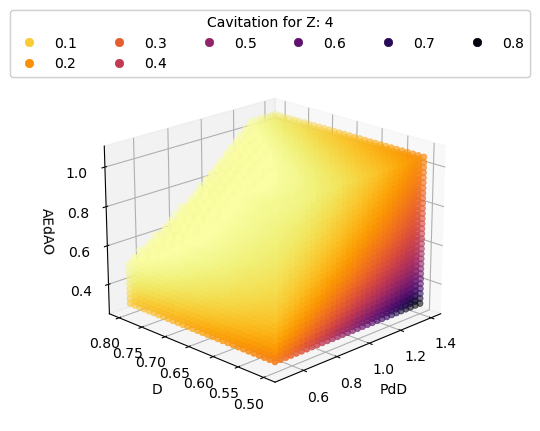

In [23]:
def show_P_B_graph(z, dfs_type, col_name):
    fig = plt.figure()
#     fig.set_figwidth(6)
#     fig.suptitle('Z: '+str(z))
    ax = plt.axes(projection='3d')
    df = dfs_type[z]
    if len(df) == 0:
        return
    
    # Data for three-dimensional scattered points
    xdata = list(df['PdD'])
    ydata = list(df['D'])
    zdata = list(df['AEdAO'])
    cdata = list(df[col_name])
    ax.set_xlabel('PdD')
    ax.set_ylabel('D')
    ax.set_zlabel('AEdAO')
    
#     g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='cool', linewidth=0.5)
#     g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='Accent', linewidth=0.5)
#     g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='viridis_r', linewidth=0.5)
    g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='inferno_r', linewidth=0.5)
#     g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='gnuplot_r', linewidth=0.5)
    
    legend = ax.legend(*g.legend_elements(),
                       loc="upper center", borderaxespad=-3,
                       title=col_name+" for Z: "+str(z),
                       ncol=6) 
    ax.add_artist(legend);
    
#     ax.view_init(20, -47)
    ax.view_init(20, -135)
    

z = 4
# show_P_B_graph(z, dfs_velocity, 'Velocity')
show_P_B_graph(z, dfs_cavitation, 'Cavitation')
# show_P_B_graph(z, dfs_strenght, 'Strenght')

In [24]:
# df_all = pd.concat([dfs_P_B[z] for z in dfs_P_B], ignore_index=True)
# # remove duplicates keeping the smaller P_B
# df_all = df_all.sort_values(['P_B'], ascending=True)
# df_all = df_all.drop_duplicates(['D', 'AEdAO', 'PdD'])

In [25]:
# # Plot showing all the range of variables

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# # Data for three-dimensional scattered points
# xdata = list(df_all['PdD'])
# ax.set_xlabel('PdD')
# ax.set_xlim(range_PdD)
# ydata = list(df_all['D'])
# ax.set_ylabel('D')
# ax.set_ylim(range_D)
# zdata = list(df_all['AEdAO'])
# ax.set_zlabel('AEdAO')
# ax.set_zlim(range_AEdAO)
# # color data
# cdata = list(df_all['P_B'])

# g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='inferno_r');
# # ax.set_facecolor("gray")

# legend = ax.legend(*g.legend_elements(),
#                    loc="upper center", borderaxespad=-3,
#                    title="Power Brake for V_S="+V_S[0]+'.'+V_S[2],
#                    ncol=6) 
# ax.add_artist(legend);

# ax.view_init(20, -47)
# # ax.view_init(20, -135)

In [26]:
# print("With zoom")

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# # Data for three-dimensional scattered points
# xdata = list(df_all['PdD'])
# ax.set_xlabel('PdD')
# ydata = list(df_all['D'])
# ax.set_ylabel('D')
# zdata = list(df_all['AEdAO'])
# ax.set_zlabel('AEdAO')
# # color data
# cdata = list(df_all['P_B'])

# g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='inferno_r');
# # ax.set_facecolor("gray")

# legend = ax.legend(*g.legend_elements(),
#                    loc="upper center", borderaxespad=-3,
#                    title="Power Brake for V_S="+V_S[0]+'.'+V_S[2],
#                    ncol=6) 
# ax.add_artist(legend);

# ax.view_init(20, -47)
# # ax.view_init(20, -135)